In [3]:
import sys
import os
import typing as tp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Set the project root directory correctly
project_root = Path.cwd().parent  
# Define the base directories
base_data_dir = project_root / 'data'
data_dir = base_data_dir / 'processed'
plots_dir = project_root / 'results' / 'plots'

# Check if the directories exist
print(f"Data directory exists: {data_dir.exists()}")
print(f"Plots directory exists: {plots_dir.exists()}")


/Users/claribelgonell/PycharmProjects/DigitalTwin_CRE_RL
Data directory exists: True
Plots directory exists: True


In [4]:
state_file = data_dir / 'state_variables.csv'
if state_file.exists():
    state_df = pd.read_csv(state_file)
    print(state_df.head())
else:
    print(f"State data not found at {state_file}")

   IndustryGrowth  LeaseLength  RSFOccupied  OccupancyRate  \
0        0.025830          5.0  2448.550839       0.653912   
1       -0.072727          5.0  1809.951624       0.888305   
2       -0.009860          7.0  1386.764369       0.747356   
3        0.000000         15.0  3520.418384       0.534051   
4        0.012195          5.0  2413.599103       0.604724   

   IncentivesAvailable  EconomicIndicator  VacancyRate  
0                  0.0                1.0         0.05  
1                  1.0                0.0         0.10  
2                  0.0                1.0         0.05  
3                  0.0                1.0         0.05  
4                  1.0                0.0         0.10  


In [5]:
leases_file = data_dir / 'leases_df.csv'

# Load the leases_df
if leases_file.exists():
    leases_df = pd.read_csv(leases_file)
    print(leases_df.head())
else:
    print(f"Lease data not found at {leases_file}")

   LeaseID  TenantID  StartYear  LeaseYear  FloorLevel SuiteID  \
0      1.0       1.0       1990       1990          20    20_1   
1      2.0       1.0       1990       1990          30    30_2   
2      3.0       1.0       1990       1990           6     6_3   
3      4.0       1.0       1990       1990           8     8_4   
4      5.0       1.0       1990       1990          15    15_5   

   SuiteSquareFootage  RentAmount  AnnualRent  Occupied  VacantSpace  
0         2905.312281        12.0    34863.75      True     17094.69  
1         2251.572843        12.0    27018.87      True     17748.43  
2         4989.611574        12.0    59875.34      True     15010.39  
3         3319.059610        12.0    39828.72      True     16680.94  
4         4578.801890        12.0    54945.62      True     15421.20  


In [6]:
leases_df['VacantSpace'] = leases_df['VacantSpace'].astype(float)
leases_df['Year'] = leases_df['LeaseYear'] 

# Aggregate vacant space by year
vacant_space_df = leases_df.groupby('Year')['VacantSpace'].sum().reset_index()
vacant_space_df.columns = ['Year', 'TotalVacantSpace']


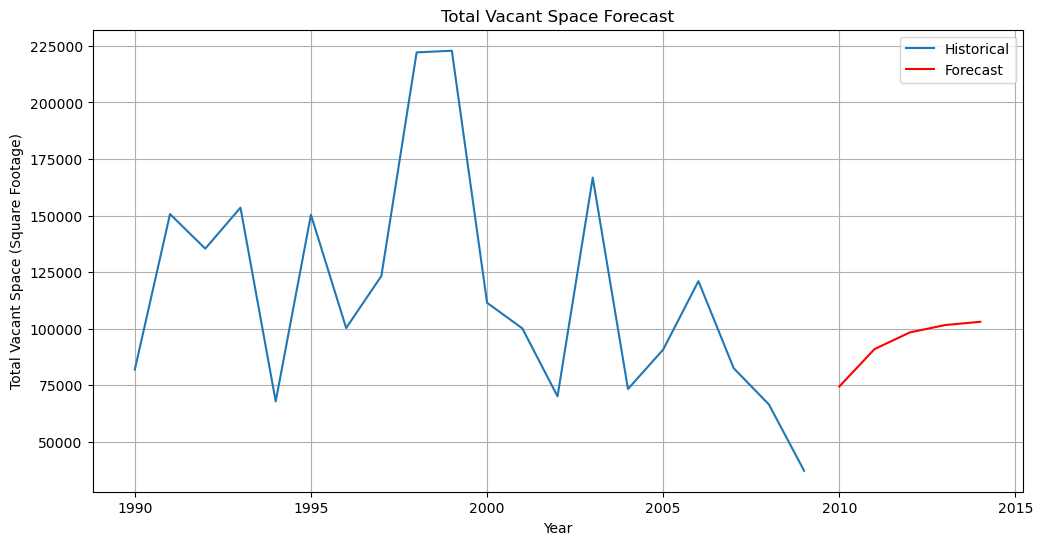

In [7]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(vacant_space_df['TotalVacantSpace'], order=(1, 1, 1))  # Adjust (p, d, q) parameters as needed
arima_model = model.fit()

# Make predictions for the next 5 years
forecast = arima_model.forecast(steps=5)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(vacant_space_df['Year'], vacant_space_df['TotalVacantSpace'], label='Historical')
plt.plot(range(vacant_space_df['Year'].max() + 1, vacant_space_df['Year'].max() + 6), forecast, label='Forecast', color='red')
plt.title('Total Vacant Space Forecast')
plt.xlabel('Year')
plt.ylabel('Total Vacant Space (Square Footage)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/05/c7/6a1be731753934a1965fa7d751dab30d5cdea1800ca34e0fe57c1d40ac35/tensorflow-2.16.2-cp39-cp39-macosx_10_15_x86_64.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/a3/61/8001b38461d751cd1a0c3a6ae84346796a5758123f3ed97a1b121dfbf4f3/gast-0.6.0-py3-none-any.whl.metadata
  Obtaining dependency information for google-pasta>=0.1.1 from https://files.pythonhosted.org/packages/a3/de/c648e

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 MB 2.5 MB/s eta 0:00:00:00:0100:01
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
Using cached gast-0.6.0-py3-none-any.whl (21 kB)
Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 9.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 7.2 MB/s eta 0:00:00:00:0100:01
Using cached libclang-18.1.1-py2.py3-none-macosx_10_9_x86_64.whl (26.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 4.5 MB/s eta 0:00:00:00:01
Using cached protobuf-4.25.5-cp37-abi3-macosx_10_9_universal2.whl (394 kB)
Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 13.1 MB/s eta 0:00:0000:0100:01
Using cached termcolor-2.5.0-py3-none-any.whl (7.8 kB)
Using cached tensorboard_data_server-0.7.2-py3-none-macosx_10_9_x86_64.

In [9]:
!pip install keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/c2/88/eef50051a772dcb4433d1f3e4c1d6576ba450fe83e89d028d7e8b85a2122/keras-3.6.0-py3-none-any.whl.metadata
  Obtaining dependency information for namex from https://files.pythonhosted.org/packages/73/59/7854fbfb59f8ae35483ce93493708be5942ebb6328cd85b3a609df629736/namex-0.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for optree from https://files.pythonhosted.org/packages/c7/e8/d864be4d0453d53d765c24450557013ceb80a233c734c994eee5419c7884/optree-0.13.0-cp39-cp39-macosx_10_9_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 546.9 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for ml-dtypes from https://files.pythonhosted.org/packages/ec/c7/6e4018b7de2189b8264f8787b413aa7c9a914332ea0e8c7e1057936594cd/ml_dtypes-0.5.0-cp39-cp39-macosx_10_9_universal2.whl.metadata
Using cached keras-3.6.0-py3-none-any.whl (1.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━

2024-10-22 18:56:54.911136: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Applications/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted vacant space for the next 5 years: [ 87061.34   88201.52   91275.195  98467.125 100064.89 ] square feet


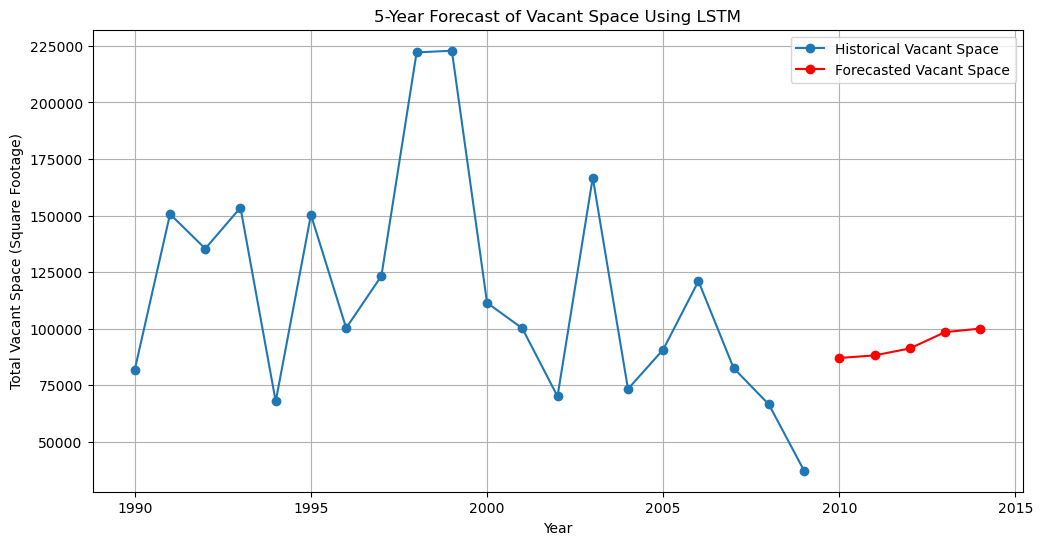

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming 'vacant_space_df' has a column 'TotalVacantSpace'
# Prepare data
scaler = MinMaxScaler(feature_range=(0, 1))
vacant_space_scaled = scaler.fit_transform(vacant_space_df['TotalVacantSpace'].values.reshape(-1, 1))

# Create lagged features (e.g., using last 3 years)
X = []
y = []

for i in range(3, len(vacant_space_scaled)):
    X.append(vacant_space_scaled[i-3:i, 0])  # Use last 3 observations as input
    y.append(vacant_space_scaled[i, 0])      # Predict the next value

X, y = np.array(X), np.array(y)

# Reshape X to [samples, time steps, features] for LSTM input
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0)

# Forecast the next 5 years using last 3 observations
X_last = vacant_space_scaled[-3:].reshape((1, 3, 1))  # Use last 3 observations for prediction
forecast_lstm = []

for _ in range(5):  # Predict next 5 years
    next_pred = model.predict(X_last)
    forecast_lstm.append(next_pred[0, 0])

    # Update X_last with the new prediction
    X_last = np.append(X_last[:, 1:, :], [[next_pred[0]]], axis=1)

# Rescale the forecasted values back to original scale
forecast_lstm_rescaled = scaler.inverse_transform(np.array(forecast_lstm).reshape(-1, 1))

# Display the forecasted results
print(f"Predicted vacant space for the next 5 years: {forecast_lstm_rescaled.flatten()} square feet")

# Prepare years for plotting
future_years = list(range(vacant_space_df['Year'].max() + 1, vacant_space_df['Year'].max() + 6))

# Plot the historical data and the forecasted results
plt.figure(figsize=(12, 6))
plt.plot(vacant_space_df['Year'], vacant_space_df['TotalVacantSpace'], label='Historical Vacant Space', marker='o')
plt.plot(future_years, forecast_lstm_rescaled, label='Forecasted Vacant Space', marker='o', color='red')
plt.xlabel('Year')
plt.ylabel('Total Vacant Space (Square Footage)')
plt.title('5-Year Forecast of Vacant Space Using LSTM')
plt.legend()
plt.grid(True)
plt.show()
